In [2]:
# import pandas
import pandas as pd
#print pd.show_versions(as_json=False)

# scrape chart data from Blockchain explorer using the custom script 'blockchain.py'
# save all data sets as csv files in the bitcoin-proj folder

from bs4 import BeautifulSoup
import urllib
import pandas as pd
import numpy as np

url = "http://blockchain.info/charts"
page = urllib.urlopen(url).read()
soup = BeautifulSoup(page)
charts = []
chart_names = []

for a in soup.findAll('a', href=True):
    if a['href'].startswith('/charts/'):
        charts.append(a['href'])
        chart_names.append(a.text)

params = "?showDataPoints=false&timespan=all&show_header=true&daysAverageString=1&scale=0&format=csv&address="


chart_url = []
for c in charts:
    str = "http://blockchain.info/" + c  + params
    chart_url.append(str)

filenames = []
for n in chart_names:
    str = n.replace(' ', '_') + ".csv"
    filenames.append(str)

length = len(charts)

for i in range(length):
    print(chart_url[i])
    print(filenames[i])
    urllib.urlretrieve(chart_url[i], filenames[i])
    
# TODO list all files in the directory


In [3]:
# create the bitcoin data frame
bitcoin = pd.DataFrame()

In [4]:
def get_data(path, field):
    result = pd.read_csv(path, header=None)
    result.rename(columns={0:'date', 1:field}, inplace=True)
    result.date = pd.to_datetime(result.date)
    #print result.tail()
    return result

In [5]:
def merge_columns(main, other):
    result = pd.merge(left=main,right=other, how='outer', left_on='date', right_on='date')
    #print result.tail()
    return result

In [6]:
# read in the average block size data
path = 'Average_Block_Size.csv'
field = 'block_size'

block_size = get_data(path, field)

In [7]:
# add the average number of transactions per block
path = 'Average_Number_of_Transactions_per_Block.csv'
field = 'block_transactions'
block_transactions = get_data(path, field)

In [8]:
bitcoin = merge_columns(block_size, block_transactions)

In [9]:
# add the blockchain size
path = 'Blockchain_Size.csv'
field = 'blockchain_size'
blockchain_size = get_data(path, field)

bitcoin = merge_columns(bitcoin, blockchain_size)

In [10]:
# add the cost per transaction
path = 'Cost_per_Transaction.csv'
field = 'transaction_cost'
transaction_cost = get_data(path, field)

bitcoin = merge_columns(bitcoin, transaction_cost)

In [11]:
# add cost as percent of transaction volume
path = 'Cost_%_of_Transaction_Volume.csv'
field = 'percent_cost'
percent_cost = get_data(path, field)

bitcoin = merge_columns(bitcoin, percent_cost)

In [12]:
path = 'Difficulty.csv'
field = 'difficulty'
difficulty = get_data(path, field)

bitcoin = merge_columns(bitcoin, difficulty)

In [13]:
path = 'Estimated_Transaction_Volume.csv'
field = 'transaction_vol'
transaction_vol = get_data(path, field)

bitcoin = merge_columns(bitcoin, transaction_vol)

In [14]:
path = 'Hash_Rate.csv'
field = 'hash_rate'
hash_rate = get_data(path, field)

bitcoin = merge_columns(bitcoin, hash_rate)

In [15]:
path = 'Market_Capitalization.csv'
field = 'market_cap'
market_cap = get_data(path, field)

bitcoin = merge_columns(bitcoin, market_cap)

In [16]:
path = 'Median_Transaction_Confirmation_Time_(With_Fee_Only).csv'
field = 'confirmation_time'
confirmation_time = get_data(path, field)

bitcoin = merge_columns(bitcoin, confirmation_time)

In [17]:
path = 'Miners_Revenue.csv'
field = 'miners_revenue'
miners_revenue = get_data(path, field)

bitcoin = merge_columns(bitcoin, miners_revenue)

In [18]:
path = 'Network_Deficit_Per_Day.csv'
field = 'deficit'
deficit = get_data(path, field)

bitcoin = merge_columns(bitcoin, deficit)

In [19]:
path = 'Number_of_Orphaned_Blocks.csv'
field = 'orphaned_blocks'
orphaned_blocks = get_data(path, field)

bitcoin = merge_columns(bitcoin, orphaned_blocks)

In [20]:
path = 'Number_of_Transactions.csv'
field = 'all_transactions'
all_transactions = get_data(path, field)

bitcoin = merge_columns(bitcoin, all_transactions)

In [21]:
path = 'Number_of_Transactions_Excluding_Chains_Longer_Than_10,000.csv'
field = 'sub10000_transactions'
sub10000_transactions = get_data(path, field)

bitcoin = merge_columns(bitcoin, sub10000_transactions)

In [22]:
path = 'Number_of_Transactions_Excluding_Chains_Longer_Than_10.csv'
field = 'sub10_transactions'
sub10_transactions = get_data(path, field)

bitcoin = merge_columns(bitcoin, sub10_transactions)

In [23]:
path = 'Number_of_Transactions_Excluding_Chains_Longer_Than_100.csv'
field = 'sub100_transactions'
sub100_transactions = get_data(path, field)

bitcoin = merge_columns(bitcoin, sub100_transactions)


In [24]:
path = 'Number_of_Transactions_Excluding_Chains_Longer_Than_1000.csv'
field = 'sub1000_transactions'
sub1000_transactions = get_data(path, field)

bitcoin = merge_columns(bitcoin, sub1000_transactions)

In [25]:
path = 'Number_of_Transactions_excluding_Long_Chains.csv'
field = 'short_transactions'
short_transactions = get_data(path, field)

bitcoin = merge_columns(bitcoin, short_transactions)

In [26]:
path = 'Number_of_Transactions_excluding_Popular_Addresses.csv'
field = 'nonpopular_transactions'
nonpopular_transactions = get_data(path, field)

bitcoin = merge_columns(bitcoin, nonpopular_transactions)

In [27]:
path = 'Number_of_Unique_Bitcoin_Addresses_Used.csv'
field = 'unique_addresses'
unique_addresses = get_data(path, field)

bitcoin = merge_columns(bitcoin, unique_addresses)

In [28]:
path = 'Total_Bitcoins_in_Circulation.csv'
field = 'total_bitcoins'
total_bitcoins = get_data(path, field)

bitcoin = merge_columns(bitcoin, total_bitcoins)

In [29]:
path = 'Total_Number_of_transactions.csv'
field = 'total_transactions'
total_transactions = get_data(path, field)

bitcoin = merge_columns(bitcoin, total_transactions)

In [30]:
path = 'Total_Transaction_Fees.csv'
field = 'transaction_fees'
transaction_fees = get_data(path, field)

bitcoin = merge_columns(bitcoin, transaction_fees)

In [31]:
path = 'Total_Output_Volume.csv'
field = 'output_vol'
output_vol = get_data(path, field)

bitcoin = merge_columns(bitcoin, output_vol)

In [32]:
path = 'Trade_Volume_vs_Transaction_Volume_Ratio.csv'
field = 'trade_transaction_ratio'
trade_transaction_ratio = get_data(path, field)

bitcoin = merge_columns(bitcoin, trade_transaction_ratio)

In [33]:
path = 'Transaction_Fees_in_USD.csv'
field = 'transaction_fees_usd'
transaction_fees_usd = get_data(path, field)

bitcoin = merge_columns(bitcoin, transaction_fees_usd)

In [34]:
path = 'USD_Exchange_Trade_Volume.csv'
field = 'exchange_vol_usd'
exchange_vol_usd = get_data(path, field)

bitcoin = merge_columns(bitcoin, exchange_vol_usd)

In [35]:
# get outcome variable 'market price in usd'
path = 'Market_Price_(USD).csv'
field = 'price_usd'
price_usd =  get_data(path, field)
price_usd['date'] = pd.DatetimeIndex(price_usd.date).normalize()
print price_usd.tail()

           date  price_usd
2502 2015-10-11     353.58
2503 2015-11-11     309.90
2504 2015-12-11     331.60
2505 2015-11-13     332.20
2506 2015-11-13     333.50


In [36]:
bitcoin_price = pd.DataFrame()
# store the date in yyyy-mm-dd format
bitcoin['date'] = pd.DatetimeIndex(bitcoin.date).normalize()

bitcoin_price = merge_columns(bitcoin, price_usd)

# TODO sort dates in chronological order

In [37]:
bitcoin_price['index'] = bitcoin_price.date.sort_values().index
print bitcoin_price.tail()

# TODO handle missing data and null values

           date  block_size  block_transactions  blockchain_size  \
2504 2015-12-11    0.522491                 NaN            46662   
2505 2015-11-13    0.470351                 NaN            46740   
2506 2015-11-13    0.470351                 NaN            46740   
2507 2015-11-13    0.483811                 NaN            46815   
2508 2015-11-13    0.483811                 NaN            46815   

      transaction_cost  percent_cost    difficulty  transaction_vol  \
2504          7.901945      0.720278  6.584826e+10           510220   
2505          8.889674      0.967701  6.584826e+10           434122   
2506          8.889674      0.967701  6.584826e+10           434122   
2507          8.484748      0.902378  6.584826e+10           437732   
2508          8.484748      0.902378  6.584826e+10           437732   

         hash_rate    market_cap  ...    unique_addresses  total_bitcoins  \
2504  4.779068e+08  4.918001e+09  ...              301266        14831125   
2505  5.46

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [39]:
#for col in bitcoin_price.columns:
    #print col

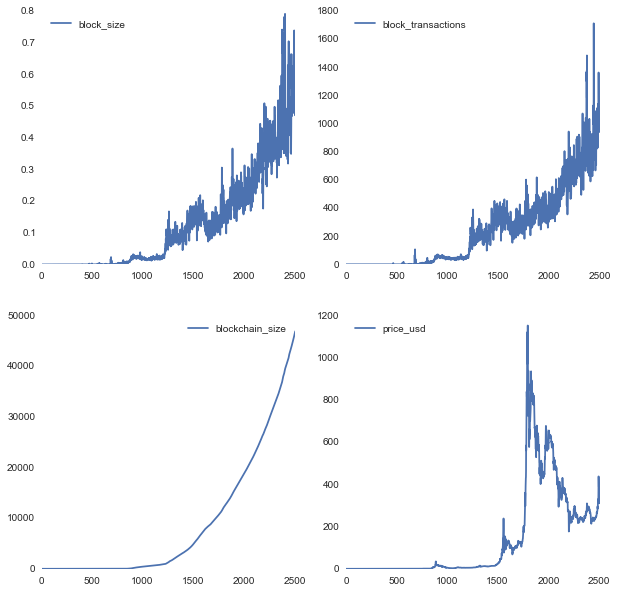

In [58]:
# plot block data over time
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
block_size.plot(ax=axes[0,0])
block_transactions.plot(ax=axes[0,1])
blockchain_size.plot(ax=axes[1,0])
price_usd.plot(ax=axes[1,1])

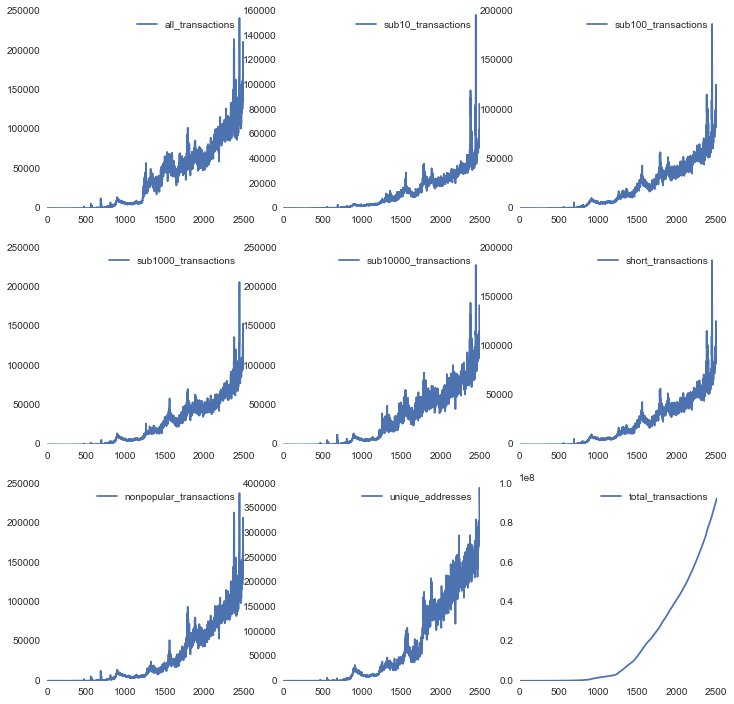

In [59]:
# plot transaction data over time
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,12))

all_transactions.plot(ax=axes[0,0])
sub10_transactions.plot(ax=axes[0,1])
sub100_transactions.plot(ax=axes[0,2])
sub1000_transactions.plot(ax=axes[1,0])
sub10000_transactions.plot(ax=axes[1,1])
short_transactions.plot(ax=axes[1,2])
nonpopular_transactions.plot(ax=axes[2,0])
unique_addresses.plot(ax=axes[2,1])
total_transactions.plot(ax=axes[2,2])


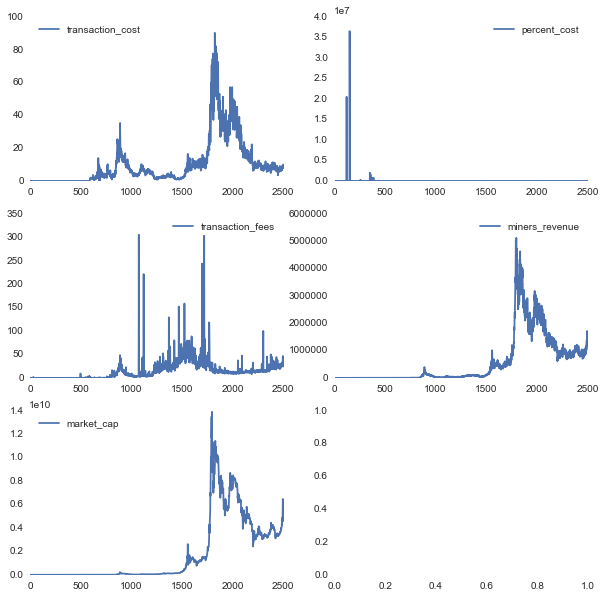

In [60]:
# plot cost and revenues over time
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

transaction_cost.plot(ax=axes[0,0])
percent_cost.plot(ax=axes[0,1])
transaction_fees.plot(ax=axes[1,0])
miners_revenue.plot(ax=axes[1,1])
market_cap.plot(ax=axes[2,0])


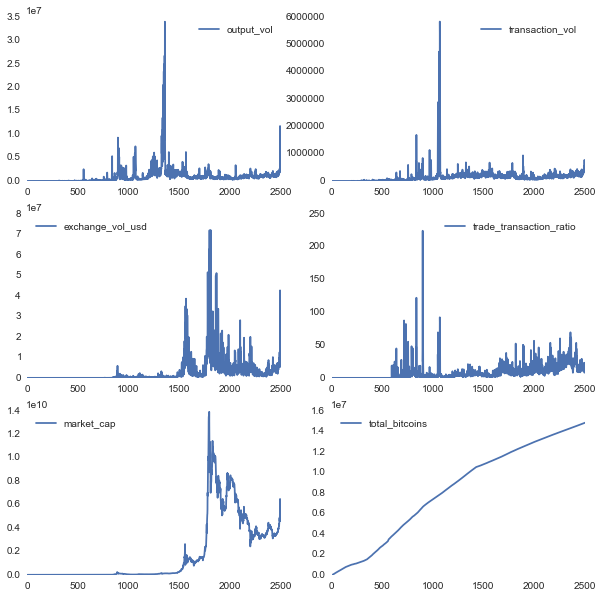

In [61]:
# plot volume and trade data over time
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

output_vol.plot(ax=axes[0,0])
transaction_vol.plot(ax=axes[0,1])
exchange_vol_usd.plot(ax=axes[1,0])
trade_transaction_ratio.plot(ax=axes[1,1])
market_cap.plot(ax=axes[2,0])
total_bitcoins.plot(ax=axes[2,1])

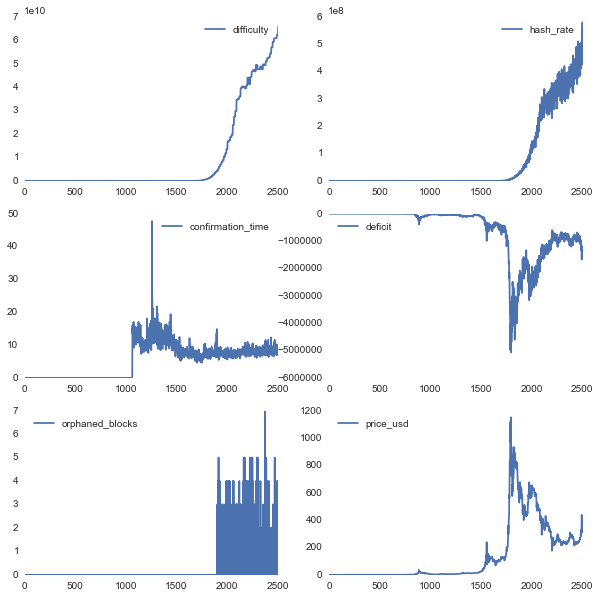

In [62]:
# plot technical stats over time
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

difficulty.plot(ax=axes[0,0])
hash_rate.plot(ax=axes[0,1])
confirmation_time.plot(ax=axes[1,0])
deficit.plot(ax=axes[1,1])
orphaned_blocks.plot(ax=axes[2,0])
price_usd.plot(ax=axes[2,1])


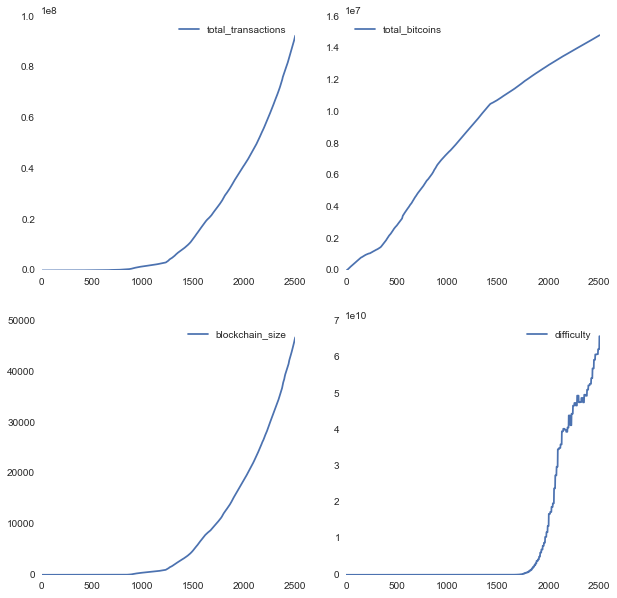

In [63]:
# plot cumulative values over time
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

total_transactions.plot(ax=axes[0,0])
total_bitcoins.plot(ax=axes[0,1])
blockchain_size.plot(ax=axes[1,0])
difficulty.plot(ax=axes[1,1])

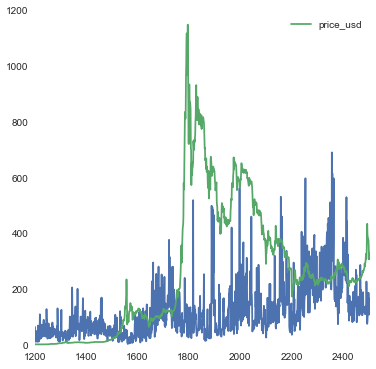

In [65]:
# compare plots of trade_transaction_ratio * 10 and price_usd
# the ratio indicates the relationship between BTC transaction volume and USD exchange volume
# and may have some predictive value

ttr10 = trade_transaction_ratio
ttr10 = ttr10['trade_transaction_ratio'].map(lambda x: x*10)
ax = ttr10[1200:].plot(figsize=(6,6))
price_usd[1200:].plot(ax=ax)


In [55]:
#remove null values from bitcoin_price
bitcoin_price.block_transactions = bitcoin_price.block_transactions.dropna()
bitcoin_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2502 entries, 0 to 2501
Data columns (total 31 columns):
date                       2502 non-null datetime64[ns]
block_size                 2502 non-null float64
block_transactions         2502 non-null float64
blockchain_size            2502 non-null float64
transaction_cost           2502 non-null float64
percent_cost               2502 non-null float64
difficulty                 2502 non-null float64
transaction_vol            2502 non-null float64
hash_rate                  2502 non-null float64
market_cap                 2502 non-null float64
confirmation_time          2502 non-null float64
miners_revenue             2502 non-null float64
deficit                    2502 non-null float64
orphaned_blocks            2502 non-null float64
all_transactions           2502 non-null float64
sub10000_transactions      2502 non-null float64
sub10_transactions         2502 non-null float64
sub100_transactions        2502 non-null float64
sub1

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


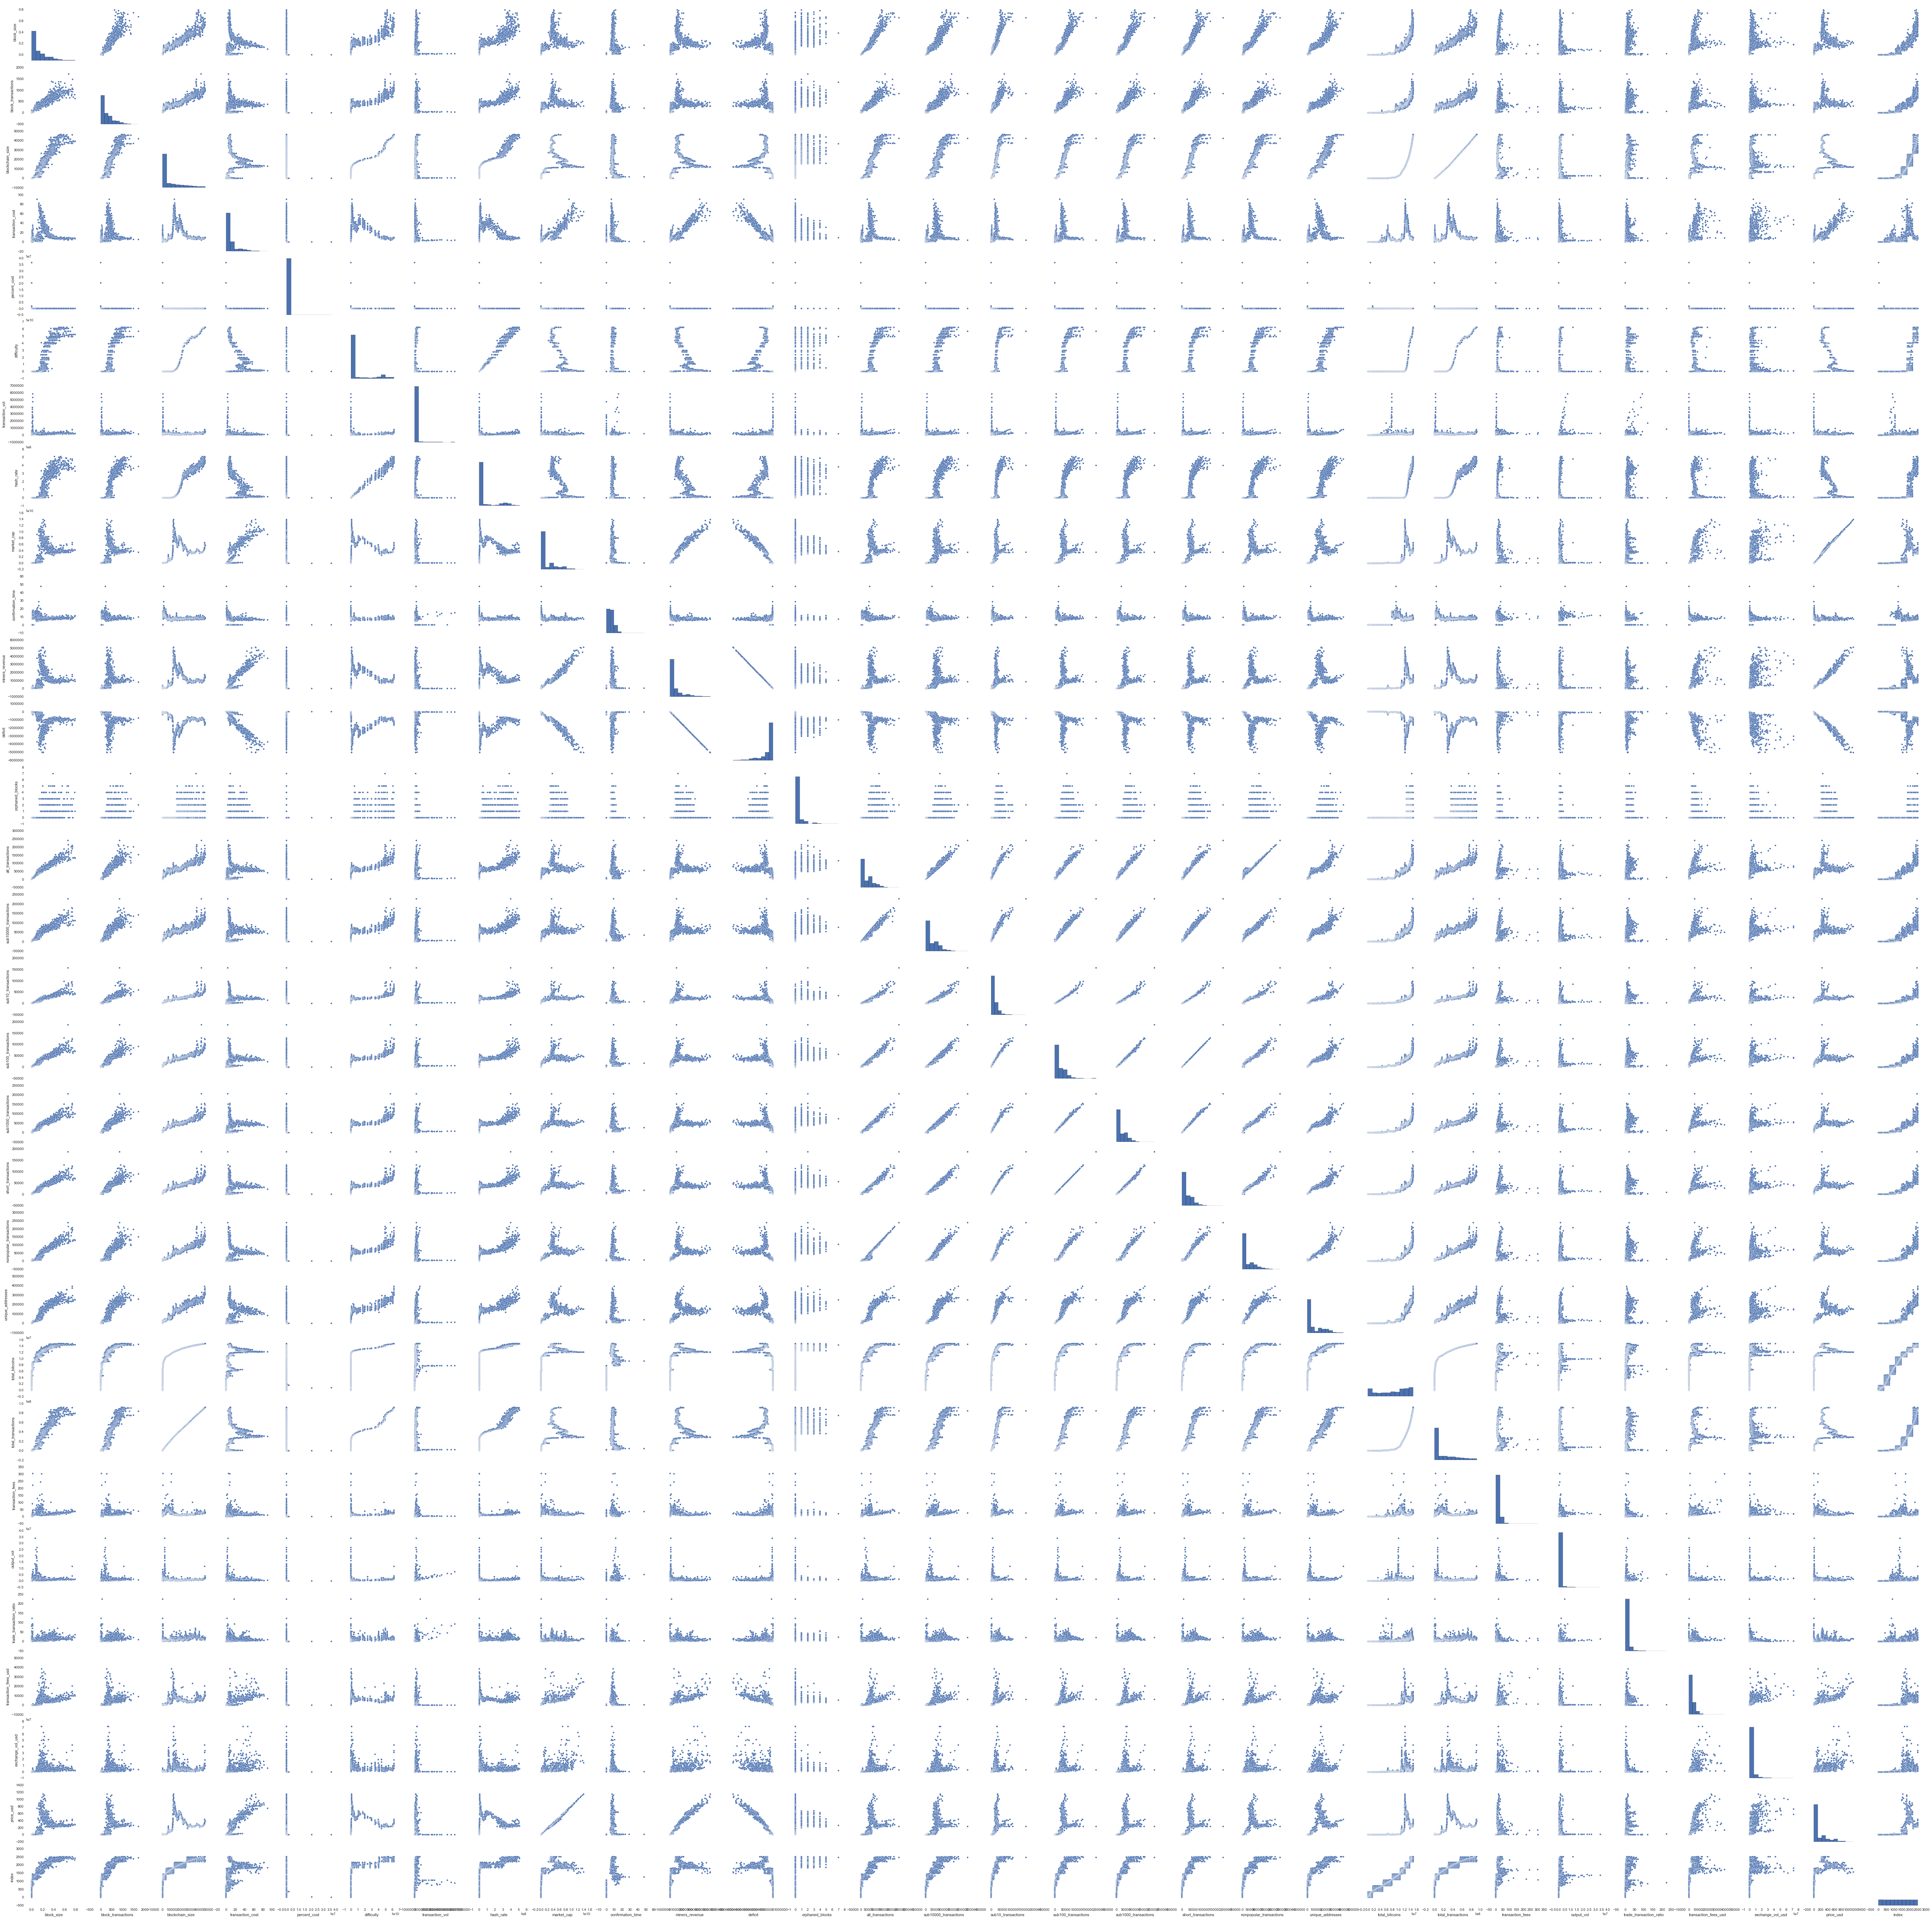

In [56]:
g = sns.pairplot(bitcoin_price)

In [66]:
for col in bitcoin_price.columns:
    print col
    

date
block_size
block_transactions
blockchain_size
transaction_cost
percent_cost
difficulty
transaction_vol
hash_rate
market_cap
confirmation_time
miners_revenue
deficit
orphaned_blocks
all_transactions
sub10000_transactions
sub10_transactions
sub100_transactions
sub1000_transactions
short_transactions
nonpopular_transactions
unique_addresses
total_bitcoins
total_transactions
transaction_fees
output_vol
trade_transaction_ratio
transaction_fees_usd
exchange_vol_usd
price_usd
index
